# 4. Ingeniería de Características

### Imputación de datos faltantes:

In [70]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [42]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [44]:
# Verificación inicial de datos faltantes
print("Datos faltantes antes de la imputación:")
print(df.isnull().sum())

Datos faltantes antes de la imputación:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


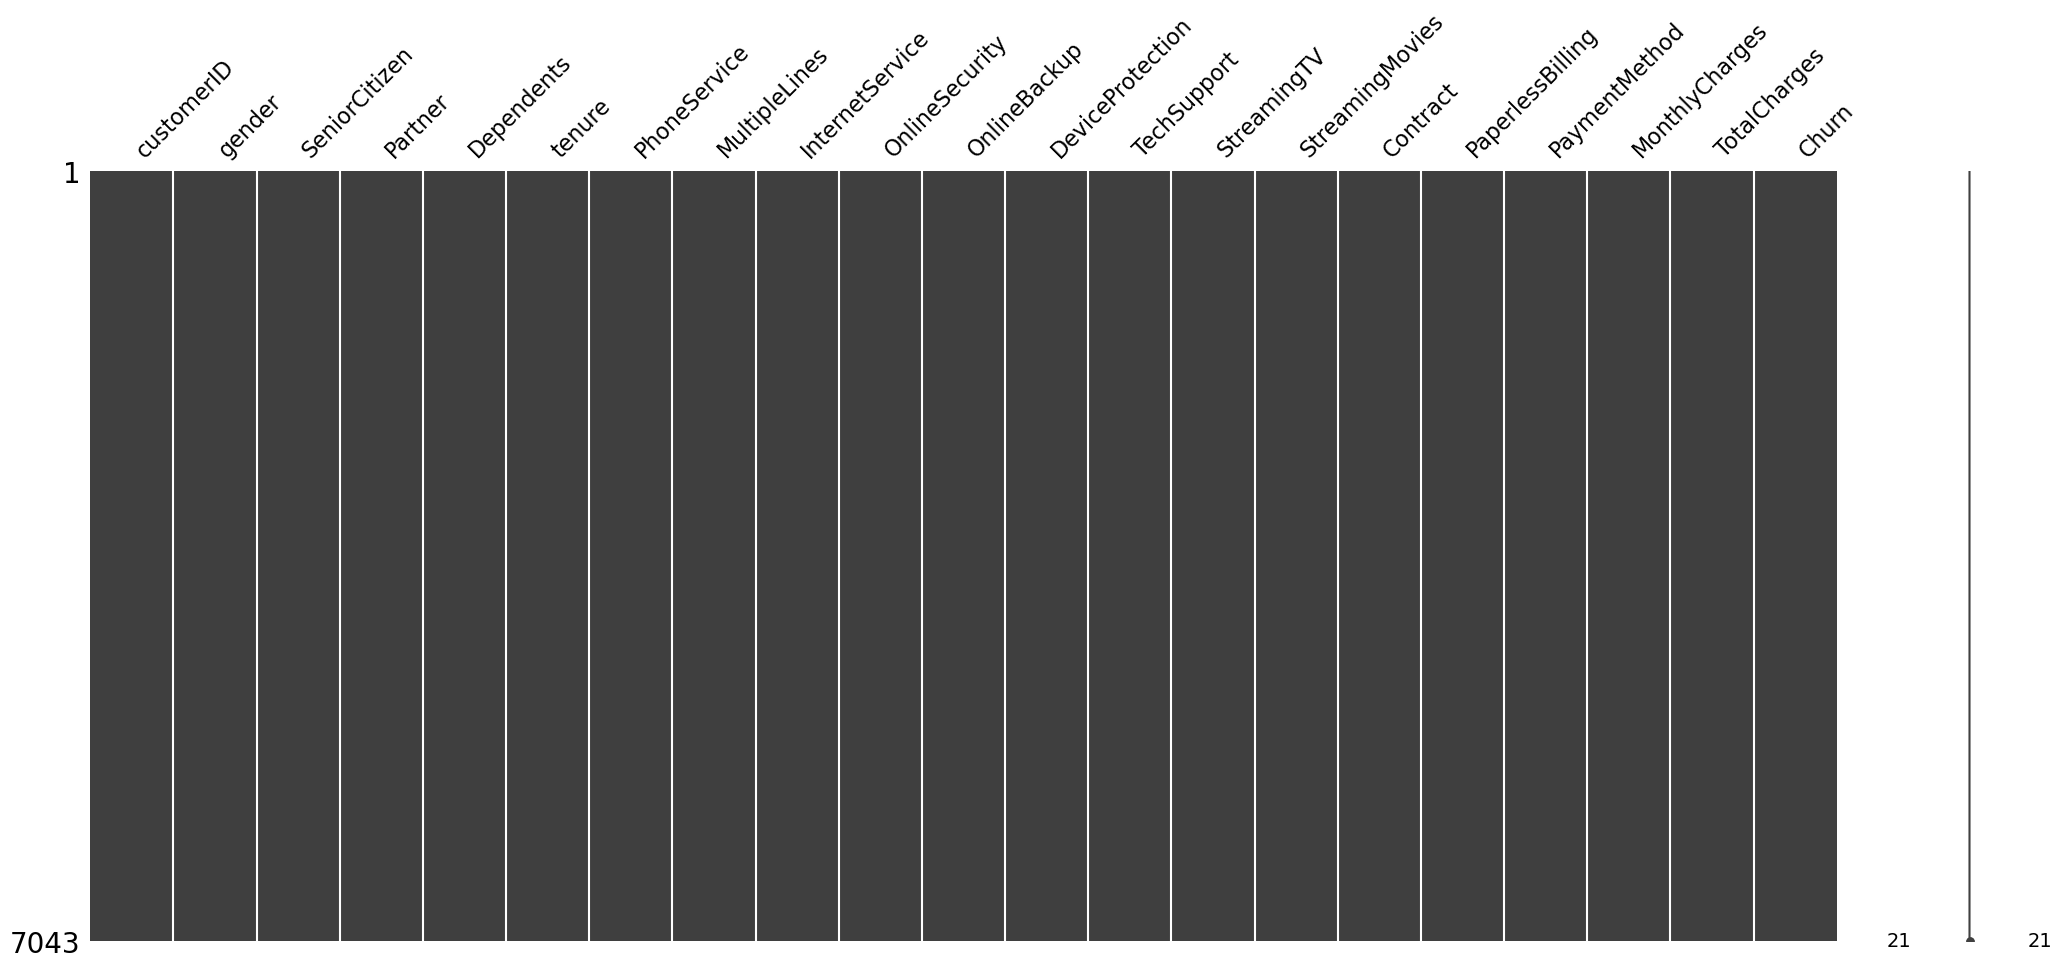

In [73]:
msno.matrix(df);

In [46]:
# Imputación de variables numéricas
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Imputación de variables categóricas (si las hubiera)
df.fillna(df.mode().iloc[0], inplace=True)

# Verificación después de la imputación
print("Datos faltantes después de la imputación:")
print(df.isnull().sum())

Datos faltantes después de la imputación:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


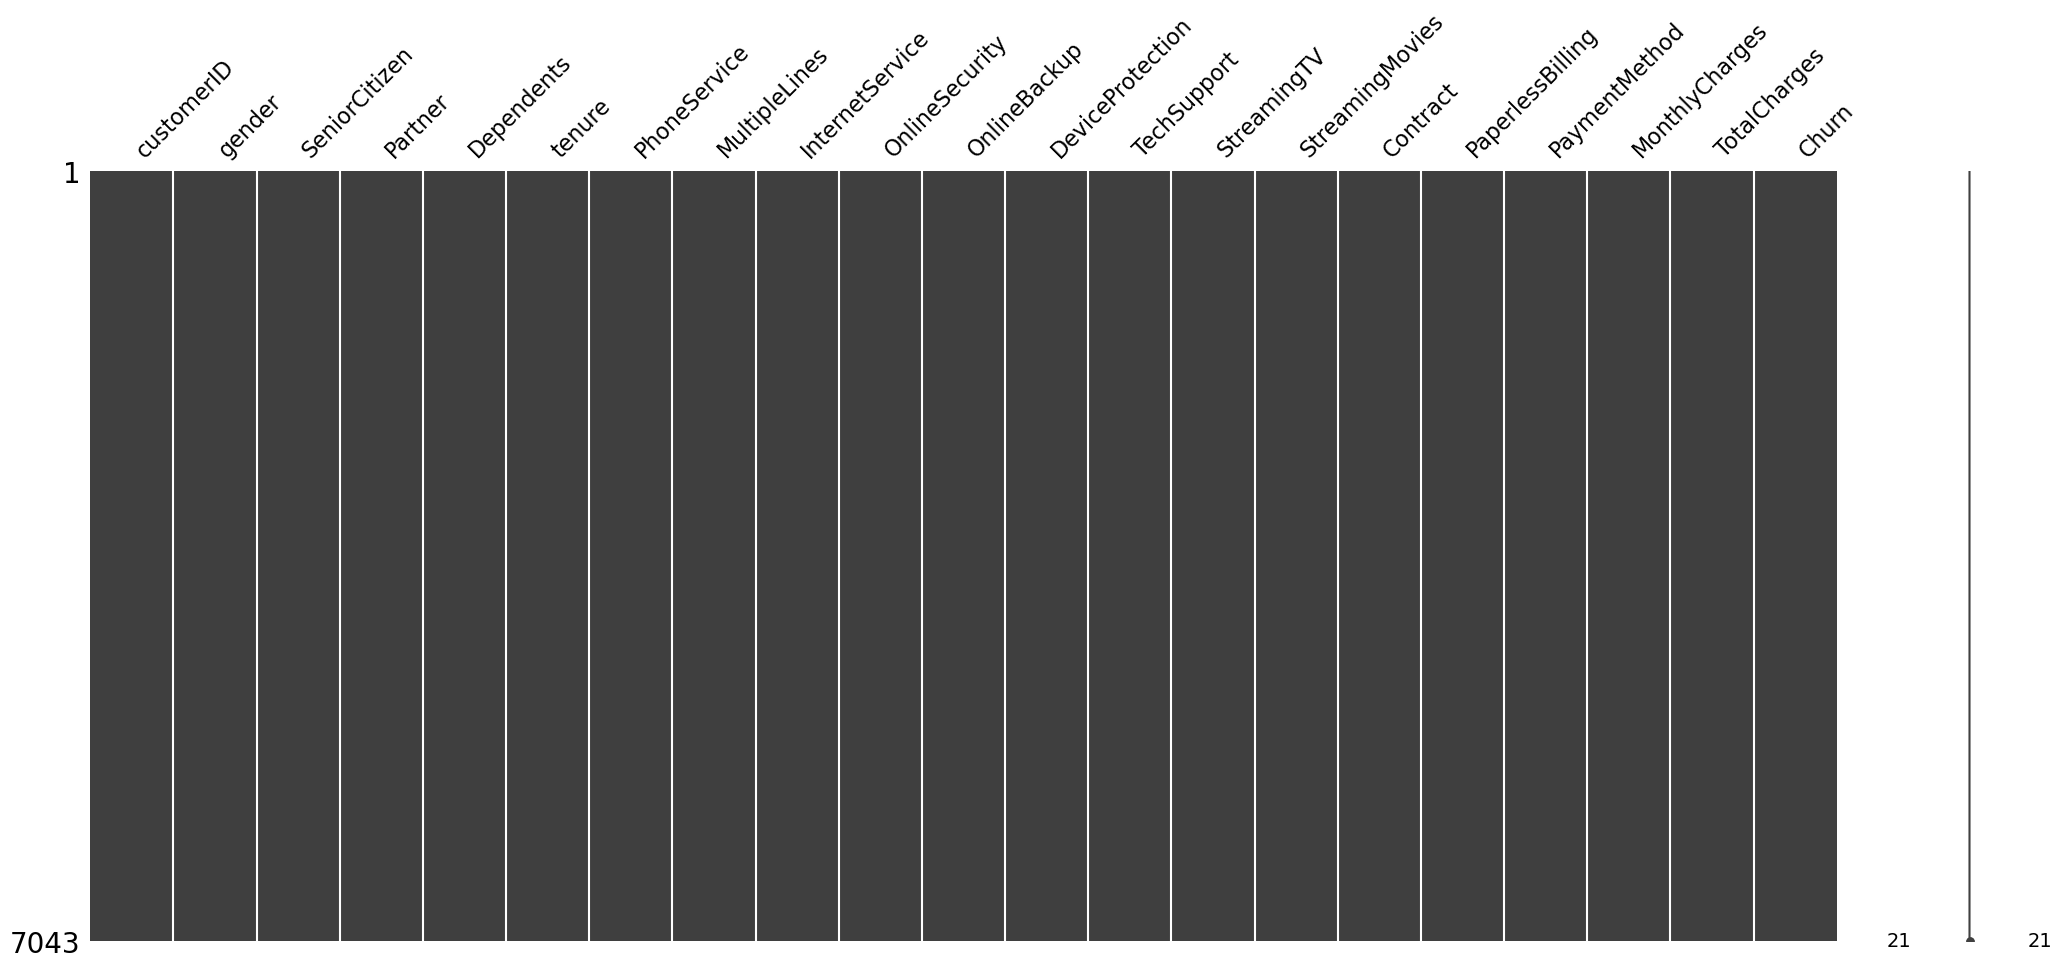

In [75]:
msno.matrix(df);

### Codificación de variables categóricas:

In [48]:
# Verificación de variables categóricas antes de la codificación
print("Tipos de datos antes de la codificación:")
print(df.dtypes)

Tipos de datos antes de la codificación:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [50]:
# Codificación One-Hot para variables categóricas
df_codificado = pd.get_dummies(df, drop_first=True)

# Verificación de variables categóricas después de la codificación
print("Tipos de datos después de la codificación:")
print(df_codificado.dtypes)

Tipos de datos después de la codificación:
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
customerID_0003-MKNFE                       bool
                                          ...   
PaperlessBilling_Yes                        bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
Churn_Yes                                   bool
Length: 7073, dtype: object


### Transformación de variables numéricas:

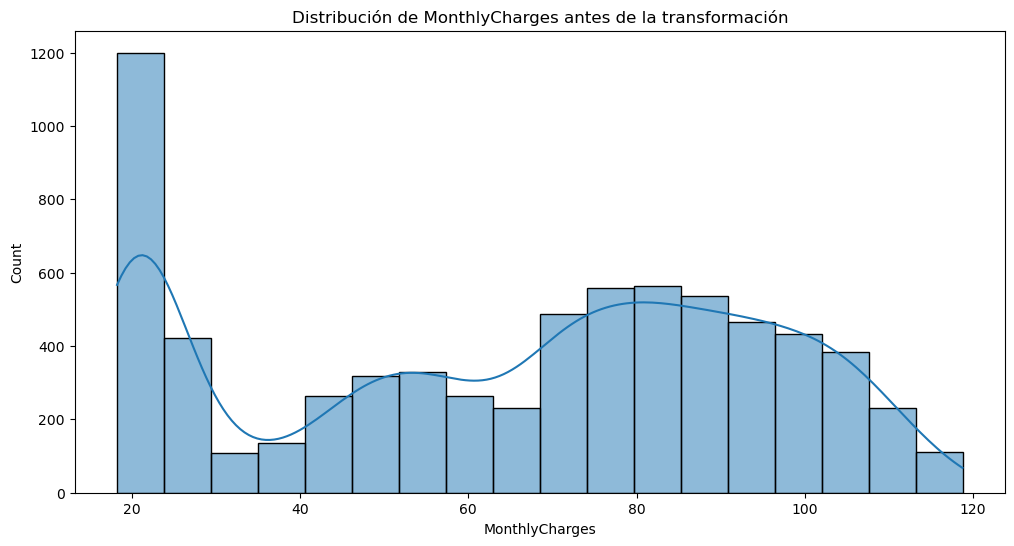

In [52]:
# Histograma antes de la transformación
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribución de MonthlyCharges antes de la transformación')
plt.show()

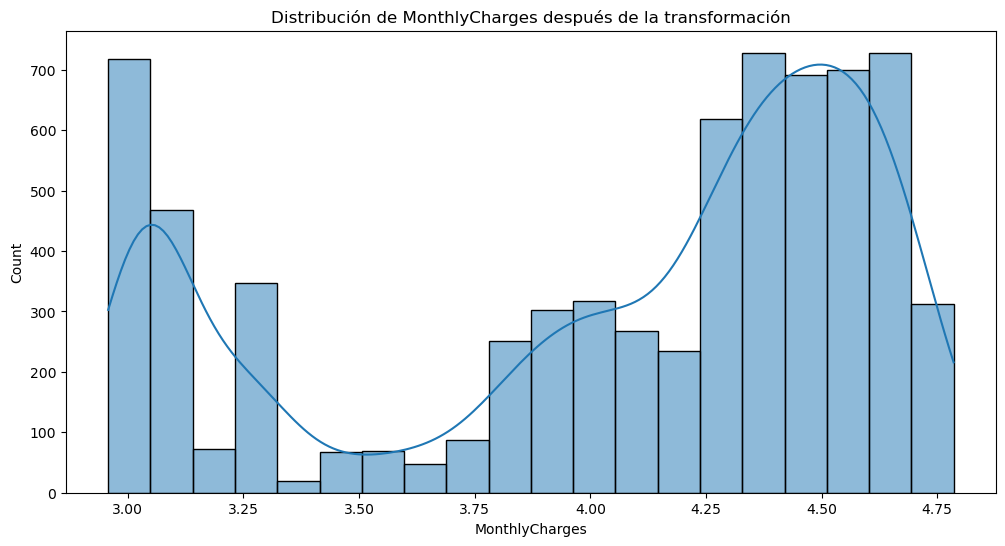

In [54]:
# Transformación logarítmica (ejemplo)
df['MonthlyCharges'] = np.log1p(df['MonthlyCharges'])

# Histograma después de la transformación
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribución de MonthlyCharges después de la transformación')
plt.show()

### Tratamiento de outliers:

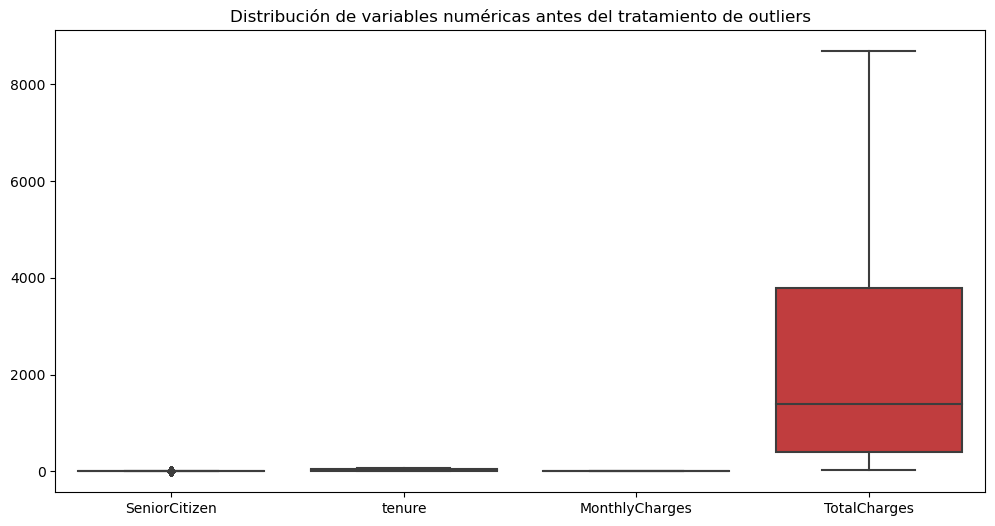

In [56]:
from scipy.stats import zscore

# Boxplot antes del tratamiento de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Distribución de variables numéricas antes del tratamiento de outliers')
plt.show()

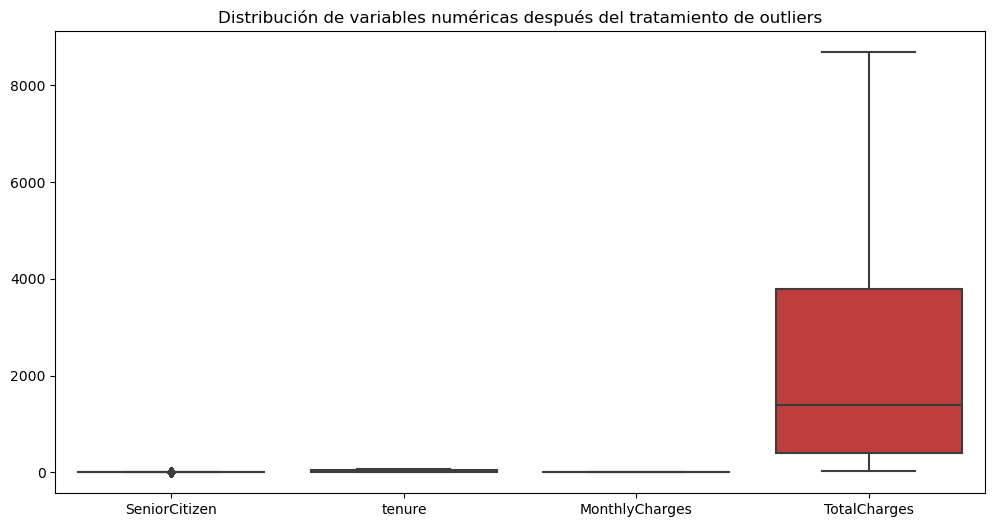

In [58]:
# Tratamiento de outliers
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Boxplot después del tratamiento de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Distribución de variables numéricas después del tratamiento de outliers')
plt.show()

### Estandarización de variables:

In [60]:
from sklearn.preprocessing import StandardScaler

# Descripción estadística antes de la estandarización
print("Descripción estadística antes de la estandarización:")
print(df.describe())

Descripción estadística antes de la estandarización:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149        4.043347   2281.916928
std         0.368612    24.559481        0.580288   2265.270398
min         0.000000     0.000000        2.957511     18.800000
25%         0.000000     9.000000        3.597312    402.225000
50%         0.000000    29.000000        4.267597   1397.475000
75%         0.000000    55.000000        4.509210   3786.600000
max         1.000000    72.000000        4.785406   8684.800000


In [62]:
# Estandarización de variables
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Descripción estadística después de la estandarización
print("Descripción estadística después de la estandarización:")
print(df.describe())

Descripción estadística después de la estandarización:
       SeniorCitizen        tenure  MonthlyCharges  TotalCharges
count   7.043000e+03  7.043000e+03    7.043000e+03  7.043000e+03
mean   -4.842546e-17 -2.421273e-17   -2.335520e-16 -1.488074e-17
std     1.000071e+00  1.000071e+00    1.000071e+00  1.000071e+00
min    -4.399165e-01 -1.318165e+00   -1.871335e+00 -9.991203e-01
25%    -4.399165e-01 -9.516817e-01   -7.686980e-01 -8.298459e-01
50%    -4.399165e-01 -1.372744e-01    3.864748e-01 -3.904632e-01
75%    -4.399165e-01  9.214551e-01    8.028709e-01  6.642871e-01
max     2.273159e+00  1.613701e+00    1.278869e+00  2.826743e+00
